In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import logging
import logging
logging.basicConfig(filename='model.log',level=logging.INFO, filemode='w', format='%(asctime)s - %(levelname)s - %(message)s')

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
url1="https://raw.githubusercontent.com/Frisk516/Diabetes_and_Cardio_MLmodel/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv"
url2="https://raw.githubusercontent.com/Frisk516/Diabetes_and_Cardio_MLmodel/refs/heads/main/cardio_train.csv"
df1=pd.read_csv(url1)
df2=pd.read_csv(url2,sep=';')
df1.sample(frac=1)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
136854,2.0,1.0,1.0,1.0,34.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,1.0,7.0,5.0,5.0
36460,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,4.0,6.0
147458,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
75965,0.0,0.0,1.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,4.0,2.0,0.0,1.0,9.0,6.0,7.0
13541,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,11.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124779,0.0,1.0,1.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,12.0,4.0,5.0
115696,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,10.0,0.0,0.0,0.0,6.0,6.0,8.0
144318,0.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,20.0,5.0,1.0,0.0,7.0,5.0,5.0
27328,2.0,0.0,0.0,1.0,40.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0


In [7]:
df2.sample(frac=1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1334,1874,22485,1,160,80.0,110,80,1,1,0,0,0,1
897,1250,18018,2,160,85.0,120,60,1,1,0,0,1,0
35650,50915,19644,2,169,100.0,150,90,2,2,0,0,1,1
57402,81924,21738,1,154,79.0,150,100,2,2,0,0,1,0
15169,21688,21873,1,156,58.0,120,80,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,78771,18142,1,155,75.0,120,80,1,1,0,0,1,0
60016,85677,21979,1,164,60.0,120,80,1,1,0,0,0,0
61100,87219,21090,1,152,65.0,150,80,2,1,0,0,1,1
16064,22936,16957,2,156,59.0,110,70,1,3,0,0,1,0


In [10]:
if 'Diabetes_012' in df1.columns:
    diabetes=df1
    # Convert to binary: 0 = no diabetes, 1 or 2 = diabetes/prediabetes
    diabetes['target'] = diabetes['Diabetes_012'].apply(lambda x: 0 if x==0 else 1)
elif 'Diabetes_binary' in diabetes.columns:
    diabetes['target'] = diabetes['Diabetes_binary']
else:
    raise ValueError("No diabetes target column found!")



In [12]:
diabetes_features = diabetes[['target', 'Age', 'Sex', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity']]
cardio = df2
cardio_features = cardio[['cardio', 'age', 'gender', 'ap_hi', 'ap_lo', 'weight', 'smoke', 'active']]


In [13]:
diabetes_features.rename(columns={
    'Age':'age',
    'Sex':'gender',
    'HighBP':'high_bp',
    'HighChol':'high_chol',
    'BMI':'bmi',
    'Smoker':'smoker',
    'PhysActivity':'active'
}, inplace=True)

cardio_features.rename(columns={
    'cardio':'target',
    'ap_hi':'high_bp',      # systolic BP as a proxy
    'ap_lo':'high_chol',    # diastolic BP as a proxy
    'weight':'bmi'
}, inplace=True)

In [14]:
#combining datasets vertically since there's no common target
combined = pd.concat([diabetes_features, cardio_features], ignore_index=True)

In [15]:
#checking for null
combined.isnull().sum()


target            0
age               0
gender            0
high_bp           0
high_chol         0
bmi               0
smoker        70000
active            0
smoke        253680
dtype: int64

In [16]:
#imputing null with median
combined['smoker'].fillna(combined['smoker'].median(), inplace=True)
combined['smoke'].fillna(combined['smoke'].median(), inplace=True)

In [17]:
combined.isnull().sum()

target       0
age          0
gender       0
high_bp      0
high_chol    0
bmi          0
smoker       0
active       0
smoke        0
dtype: int64

In [18]:
#separating numerical and categorical columns
numerical = combined.select_dtypes(exclude=['object'])
categorical = combined.select_dtypes(include=['object'])


In [19]:
#performing EDA
from collections import OrderedDict
stats=[]
for i in numerical.columns:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':numerical[i].mean(),
        'median':numerical[i].median(),
        'mode':numerical[i].mode()[0],
        'std':numerical[i].std(),
        'min':numerical[i].min(),
        'max':numerical[i].max()
    })
    stats.append(numerical_stats)
report=pd.DataFrame(stats)


#checking outliers
outlier_label = []
for col in report['feature']:
    Q1 = combined[col].quantile(0.25)
    Q3 = combined[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = combined[(combined[col] < LW) | (combined[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

report

,feature,mean,median,mode,std,min,max,Outlier Comment
0,target,0.231574,0.0,0.0,0.421839,0.0,1.0,Has Outliers
1,age,4216.689925,9.0,9.0,8093.691634,1.0,23713.0,Has Outliers
2,gender,0.636975,1.0,1.0,0.618416,0.0,2.0,No Outliers
3,high_bp,28.194634,1.0,0.0,89.014876,-150.0,16020.0,Has Outliers
4,high_chol,21.229980,1.0,0.0,96.181868,-70.0,11000.0,Has Outliers
5,bmi,38.292253,29.0,27.0,20.855364,10.0,200.0,Has Outliers
6,smoker,0.347328,0.0,0.0,0.476122,0.0,1.0,No Outliers
7,active,0.766748,1.0,1.0,0.422902,0.0,1.0,Has Outliers
8,smoke,0.019059,0.0,0.0,0.136732,0.0,1.0,Has Outliers


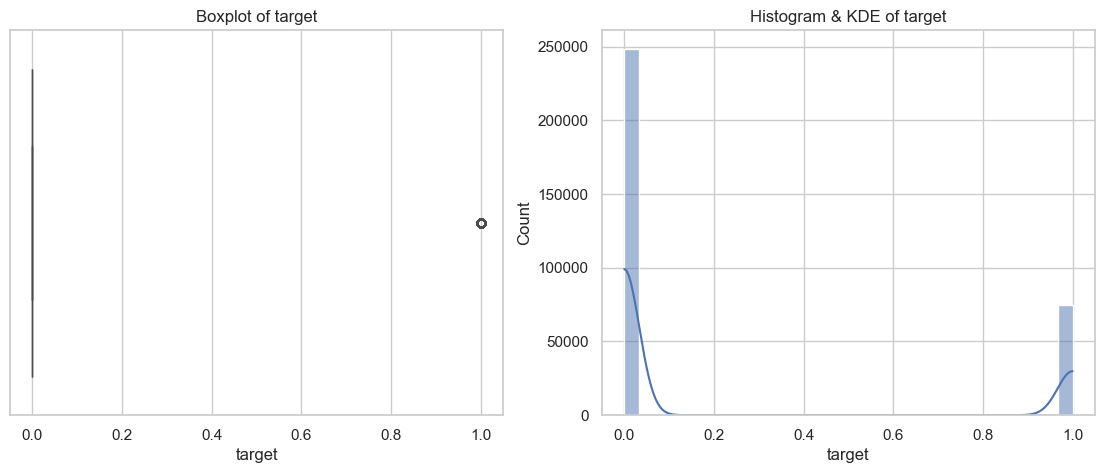

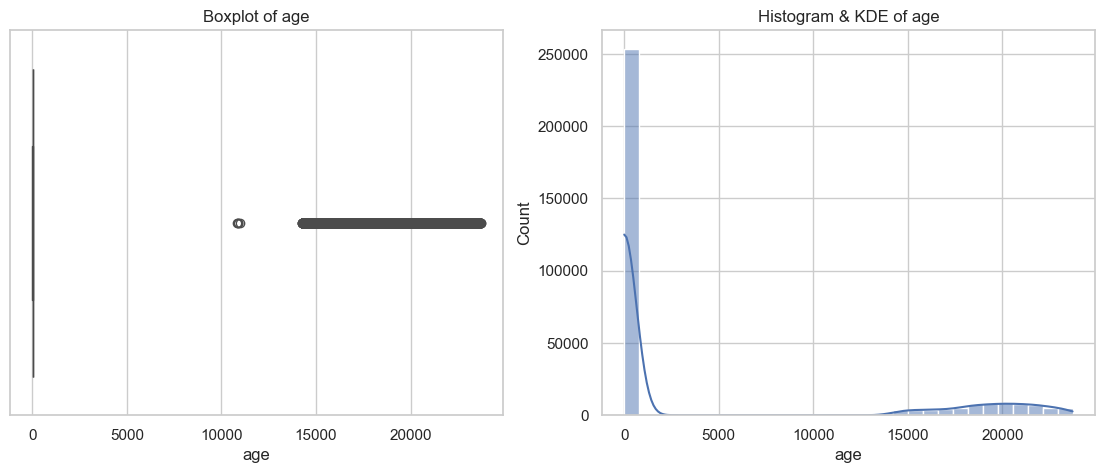

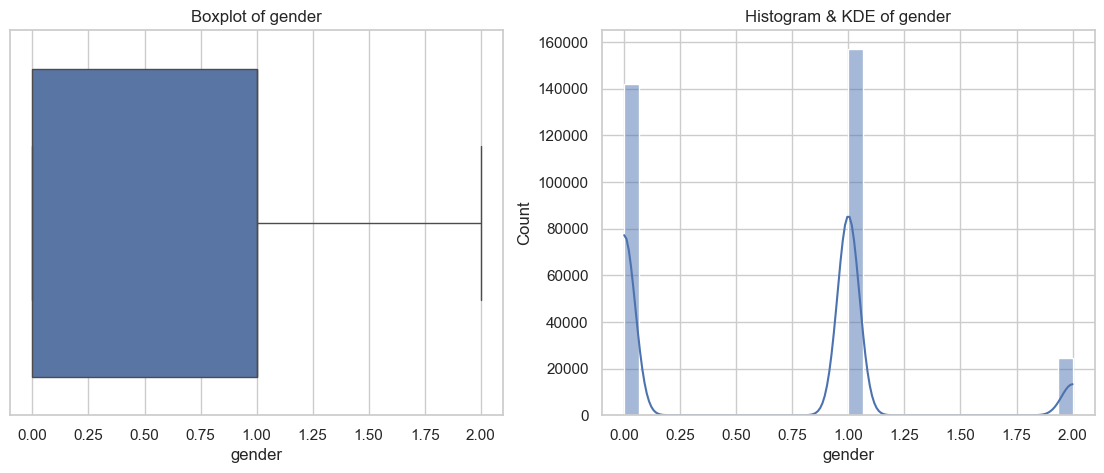

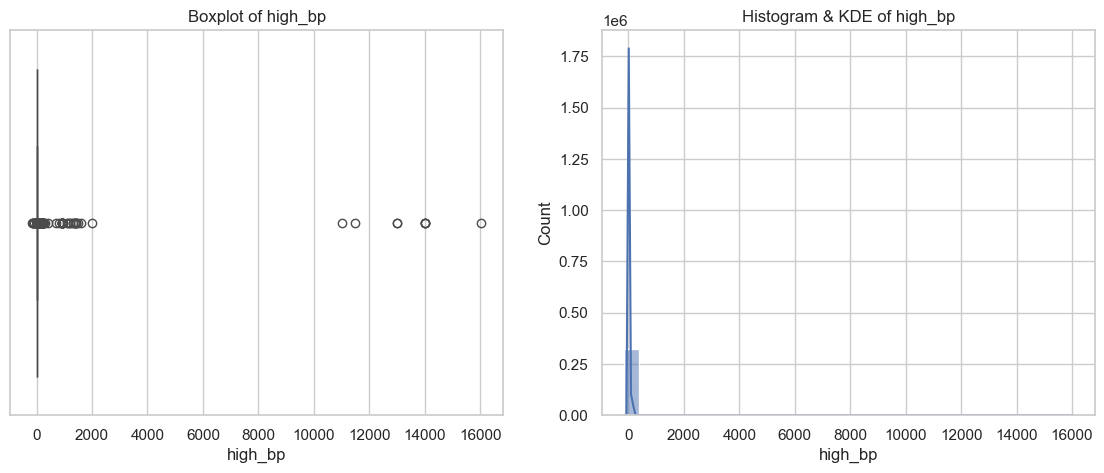

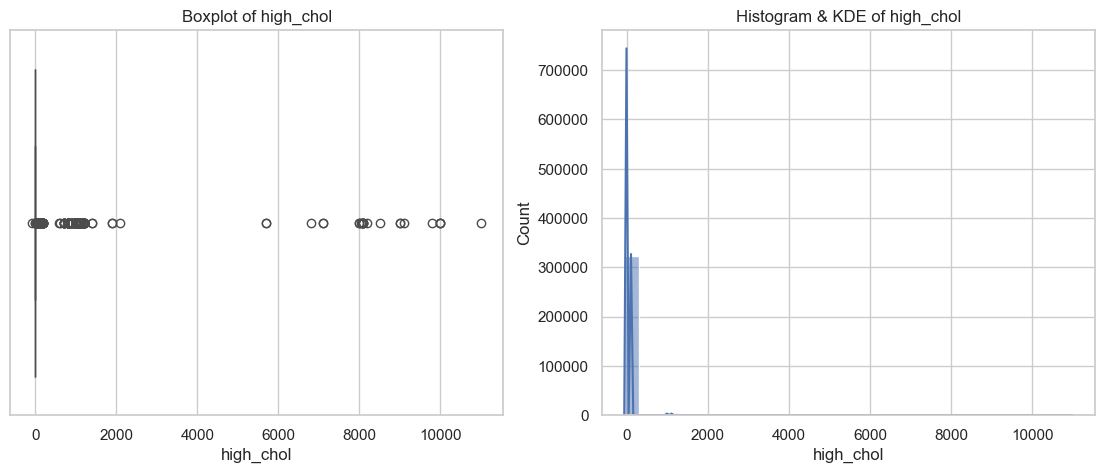

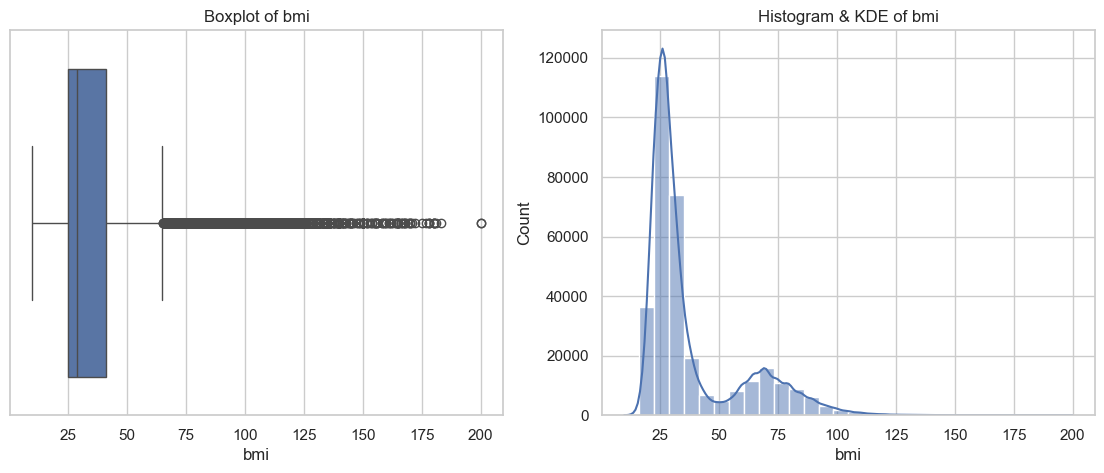

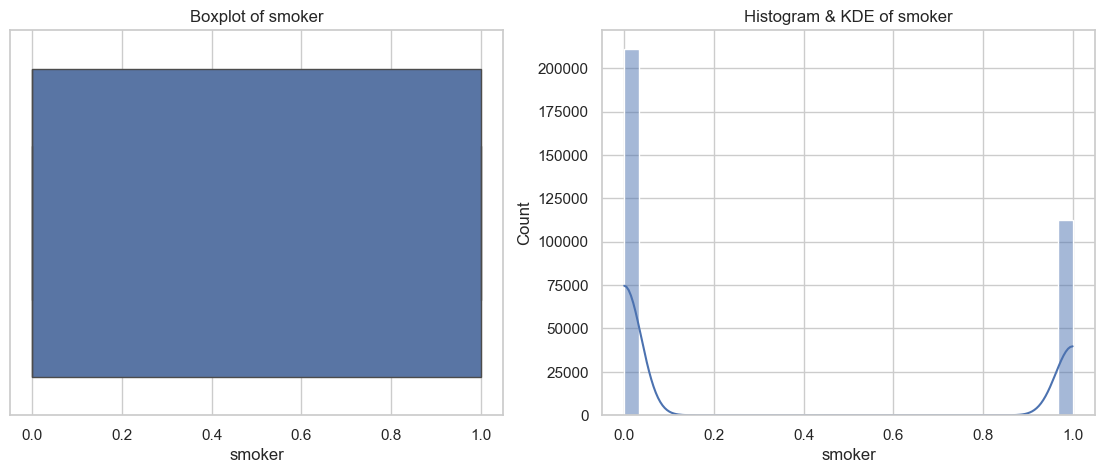

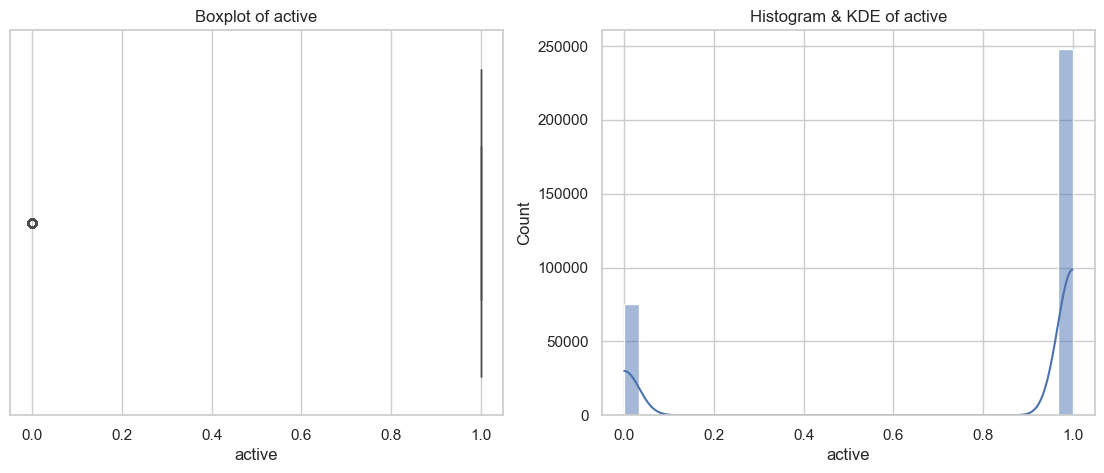

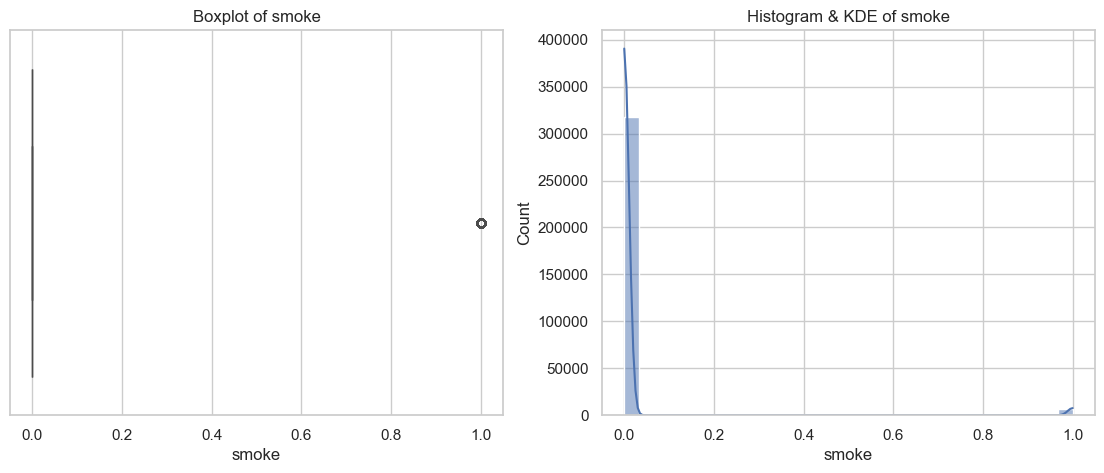

In [20]:
#checking plots for outliers and such
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in combined:
    plt.figure(figsize=(14, 5))
    
    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=combined[col])
    plt.title(f'Boxplot of {col}')
    
    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(combined[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    
    plt.show()

In [21]:
#using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in combined.select_dtypes(include='object').columns:
    combined[col] = le.fit_transform(combined[col])

In [23]:
#train test split to prevent data leak

from sklearn.model_selection import train_test_split
X=combined.drop('target',axis=1)
y=combined['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [24]:
#dataset has a considerable number of outliers especially the target column so using robust scaler

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
#using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7897923875432526
